<a href="https://colab.research.google.com/github/abdullahubaids/PPM_TUGAS6/blob/main/Tugas6_PPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# %%
# Loading library
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# %%
# Load data as a dataframe
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

iris = sklearn_to_df(datasets.load_iris())
iris.rename(columns={'target':'species'},inplace=True)

iris.describe().T


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [16]:
# %%
# Show the data
iris.head(10)
print(iris)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

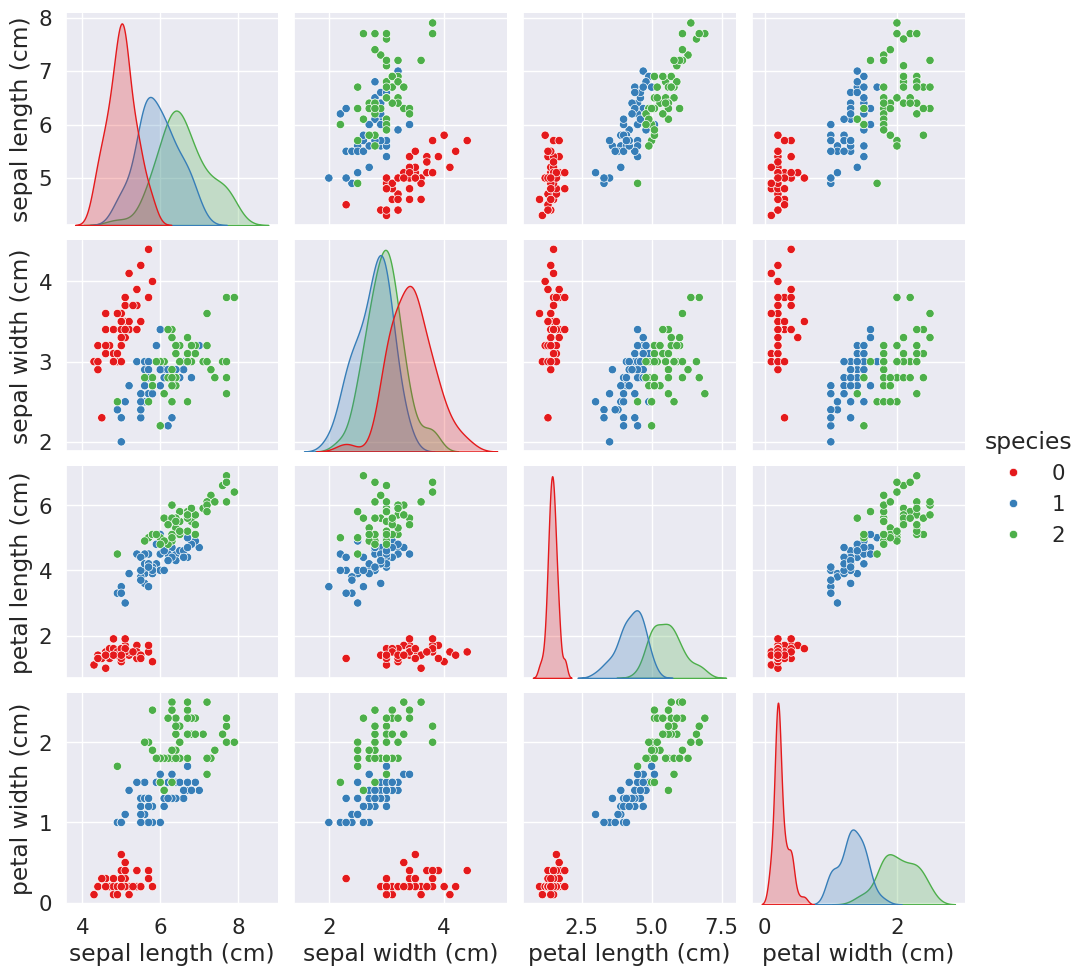

In [17]:
# %%
# Visualisasi data dengan Grafik pada data Iris
sns.pairplot(iris,hue='species',palette='Set1')


In [18]:
# %%
# Split training and testing data
from sklearn.model_selection import train_test_split
x = iris.drop('species', axis = 1)
y = iris['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)


In [19]:
# %%
# Building model using decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')  # alternative is 'gini' which is a different way to measure information gain
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(x_test)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
87                 6.3               2.3                4.4               1.3
111                6.4               2.7                5.3               1.9
10                 5.4               3.7                1.5               0.2
91                 6.1               3.0                4.6               1.4
49                 5.0               3.3                1.4               0.2
60                 5.0               2.0                3.5               1.0
72                 6.3               2.5                4.9               1.5
67                 5.8               2.7                4.1               1.0
39                 5.1               3.4                1.5               0.2
55                 5.7               2.8                4.5               1.3
66                 5.6               3.0                4.5               1.5
142                5.8               2.7                5.1     

In [20]:
# %%
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



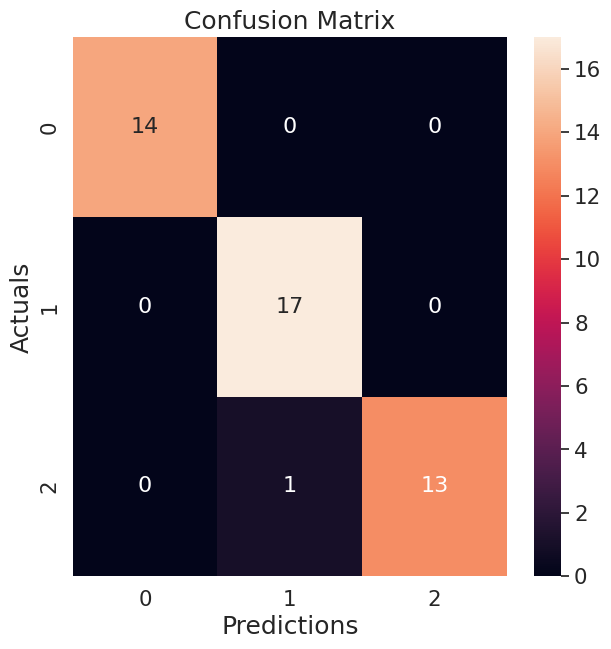

In [21]:
#%%
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, ax=ax,annot=True, annot_kws={"size": 16}) # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


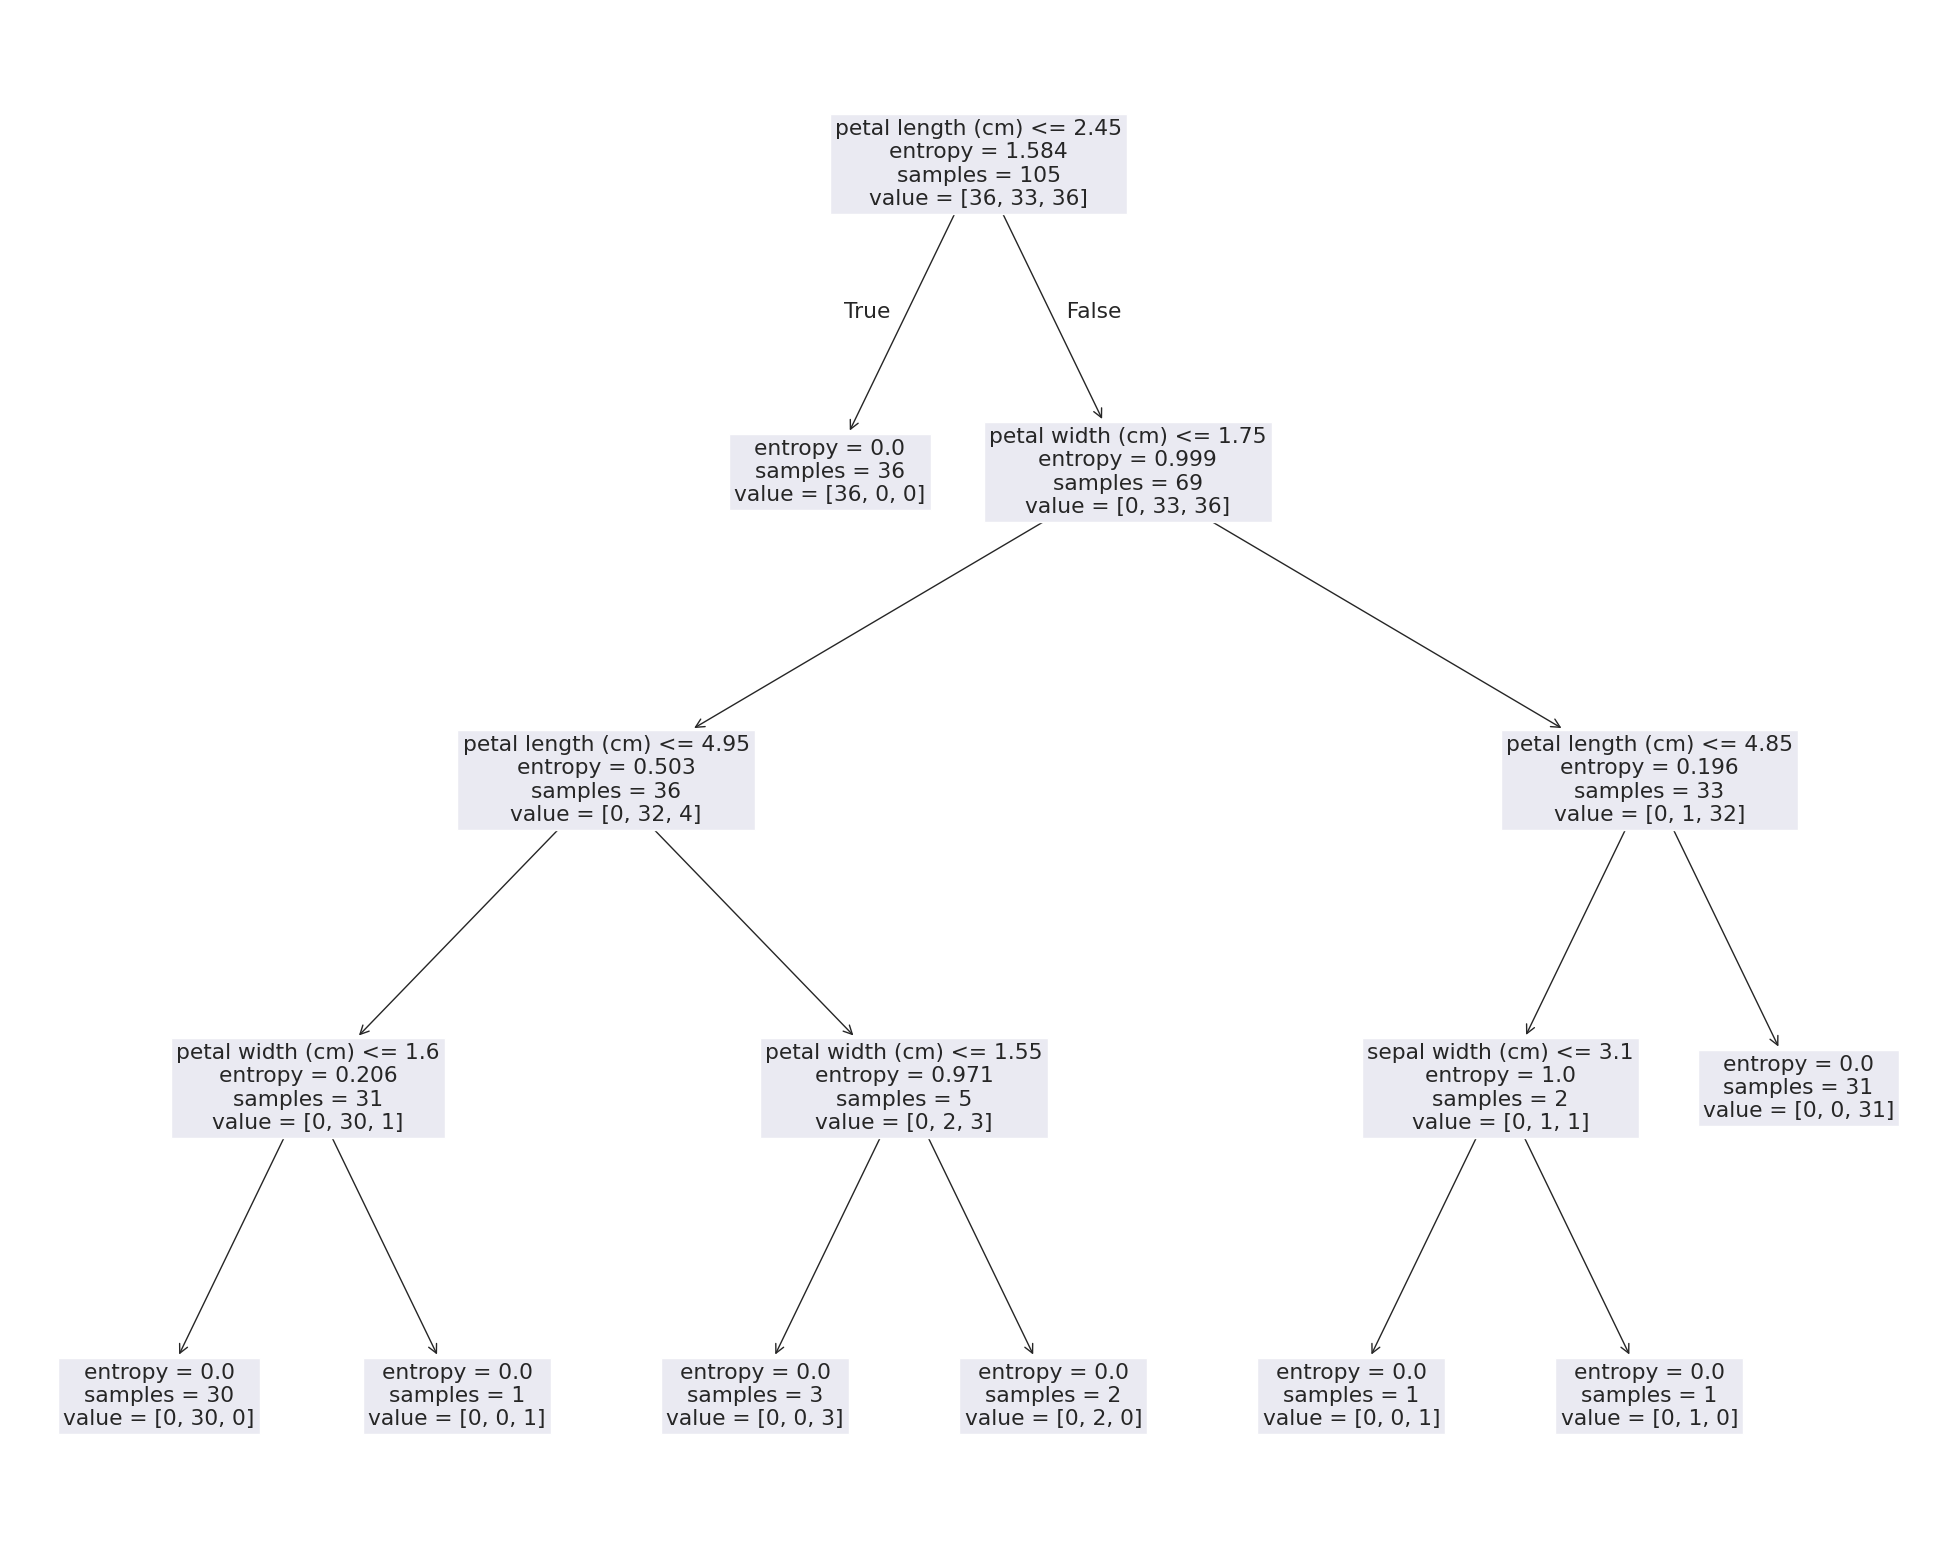

In [22]:
#%%
features = ['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)' ]

#%%
# Visualize tree
from sklearn import tree
fig, ax = plt.subplots(figsize=(25,20))
tree.plot_tree(model, feature_names=features)
plt.show()


In [23]:
# %%
# Example of creating a single Iris data point as a dictionary
iris_test_data = {
    'sepal length (cm)': 5.1,
    'sepal width (cm)': 3.5,
    'petal length (cm)': 1.4,
    'petal width (cm)': 0.1
}

# Ensure the order of features matches the training data
feature_order = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
prediction_input_df = pd.DataFrame([iris_test_data])
prediction = model.predict(prediction_input_df[feature_order]) # Ensure correct column order
print(prediction)


[0]
